# Linear models: Linear Regression


**Name** - Prithivi Raaj K

**Roll No** - 21z238



# Importing Libraries

In [139]:
import numpy as np      # for handling numbers
import matplotlib.pyplot as plt   # for data visualisation
import pandas as pd     # for handling dataset
from sklearn.model_selection import train_test_split    # to split the dataset into train and test
from sklearn.linear_model import LinearRegression   # to Linear Regression
from sklearn.metrics import r2_score    # to predict the test results
import statsmodels.api as sm    # for statsmodel summary

# Importing the Dataset

In [140]:
dataset = pd.read_csv('avocado_processed.csv')
dataset.head()

,Date,Average Price,Small,Large,XLarge,Small Bags,Large Bags,XLarge Bags,Type,Year,Region
0,1451174400000000000,0.620636,7.995299,15.607628,3.769413,12.723064,5.377630,0.0,0,2015,0
1,1450569600000000000,0.630636,7.434186,15.218177,3.945166,12.893882,5.438759,0.0,0,2015,0
2,1449964800000000000,0.392481,7.647351,17.008594,4.682910,12.594828,5.516526,0.0,0,2015,0
3,1449360000000000000,0.485033,8.111170,16.162407,4.145679,11.942806,5.879964,0.0,0,2015,0
4,1448755200000000000,0.595129,7.868726,15.182964,4.185248,12.040958,6.440275,0.0,0,2015,0


# Correlation matrix

In [141]:
correlation_mat = dataset.corr()
print(correlation_mat)

                   Date  Average Price     Small     Large    XLarge  \
Date           1.000000       0.144946  0.001115 -0.000642 -0.046810   
Average Price  0.144946       1.000000 -0.571401 -0.471338 -0.517931   
Small          0.001115      -0.571401  1.000000  0.786025  0.756059   
Large         -0.000642      -0.471338  0.786025  1.000000  0.810136   
XLarge        -0.046810      -0.517931  0.756059  0.810136  1.000000   
Small Bags     0.187043      -0.505447  0.791672  0.793284  0.769368   
Large Bags     0.185608      -0.497655  0.632600  0.650405  0.582207   
XLarge Bags    0.168994      -0.412866  0.603989  0.612979  0.643383   
Type          -0.000060       0.621059 -0.726710 -0.744364 -0.784707   
Year           0.950274       0.091900  0.011944  0.009653 -0.038700   
Region        -0.000101      -0.018283  0.196918  0.080366  0.073381   

               Small Bags  Large Bags  XLarge Bags      Type      Year  \
Date             0.187043    0.185608     0.168994 -0.000060 

# Positively and Negatively correlated attributes

**Separating the positively and negatively correlated attributes**

In [142]:
positive_correlated = {}
negative_correlated = {}

for i in dataset.columns:
  corr = dataset[i].corr(dataset['Average Price'])
  if(corr > 0.0):
    positive_correlated[i] = corr
  else:
    negative_correlated[i] = corr
  print(f"Correlation between {i} and Average Price: {corr}")

Correlation between Date and Average Price: 0.14494614925153265
Correlation between Average Price and Average Price: 1.0
Correlation between Small and Average Price: -0.5714014592560471
Correlation between Large and Average Price: -0.47133775409131246
Correlation between XLarge and Average Price: -0.5179307071215813
Correlation between Small Bags and Average Price: -0.5054467045089625
Correlation between Large Bags and Average Price: -0.4976547404109524
Correlation between XLarge Bags and Average Price: -0.4128660004223328
Correlation between Type and Average Price: 0.6210590485589613
Correlation between Year and Average Price: 0.09189950321649681
Correlation between Region and Average Price: -0.018283285164065997


**Positively correlated attributes**

In [143]:
positive_correlated.pop('Average Price')
print(positive_correlated)

{'Date': 0.14494614925153265, 'Type': 0.6210590485589613, 'Year': 0.09189950321649681}


# Scatterplot for Positively correlated attributes

Three attributes - Date, Type and Year are positively correlated, their scatter plots are drawn.


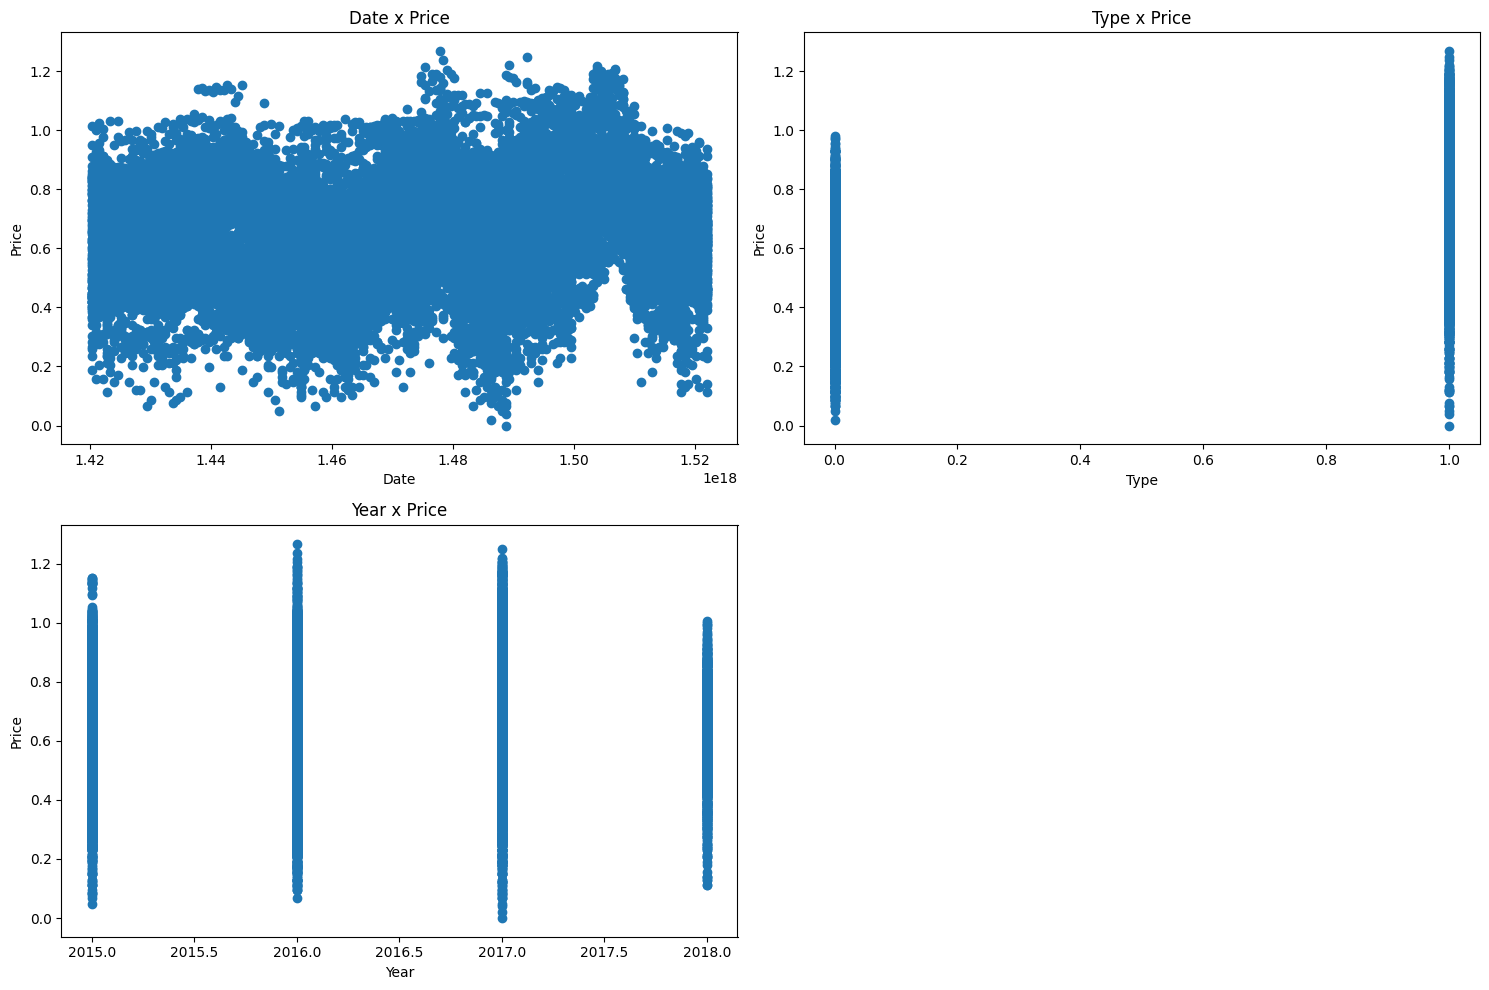

In [144]:
num_plots = len(positive_correlated)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

axs = axs.flatten()

for i, column in enumerate(positive_correlated):
    axs[i].scatter(dataset[column], dataset['Average Price'])
    axs[i].set_xlabel(f'{column}')
    axs[i].set_ylabel('Price')
    axs[i].set_title(f'{column} x Price')

for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()


**Negatively correlated attributes**

In [145]:
negative_correlated.pop('XLarge Bags')
print(negative_correlated)

{'Small': -0.5714014592560471, 'Large': -0.47133775409131246, 'XLarge': -0.5179307071215813, 'Small Bags': -0.5054467045089625, 'Large Bags': -0.4976547404109524, 'Region': -0.018283285164065997}


# Scatterplot for Negatively correlated attributes

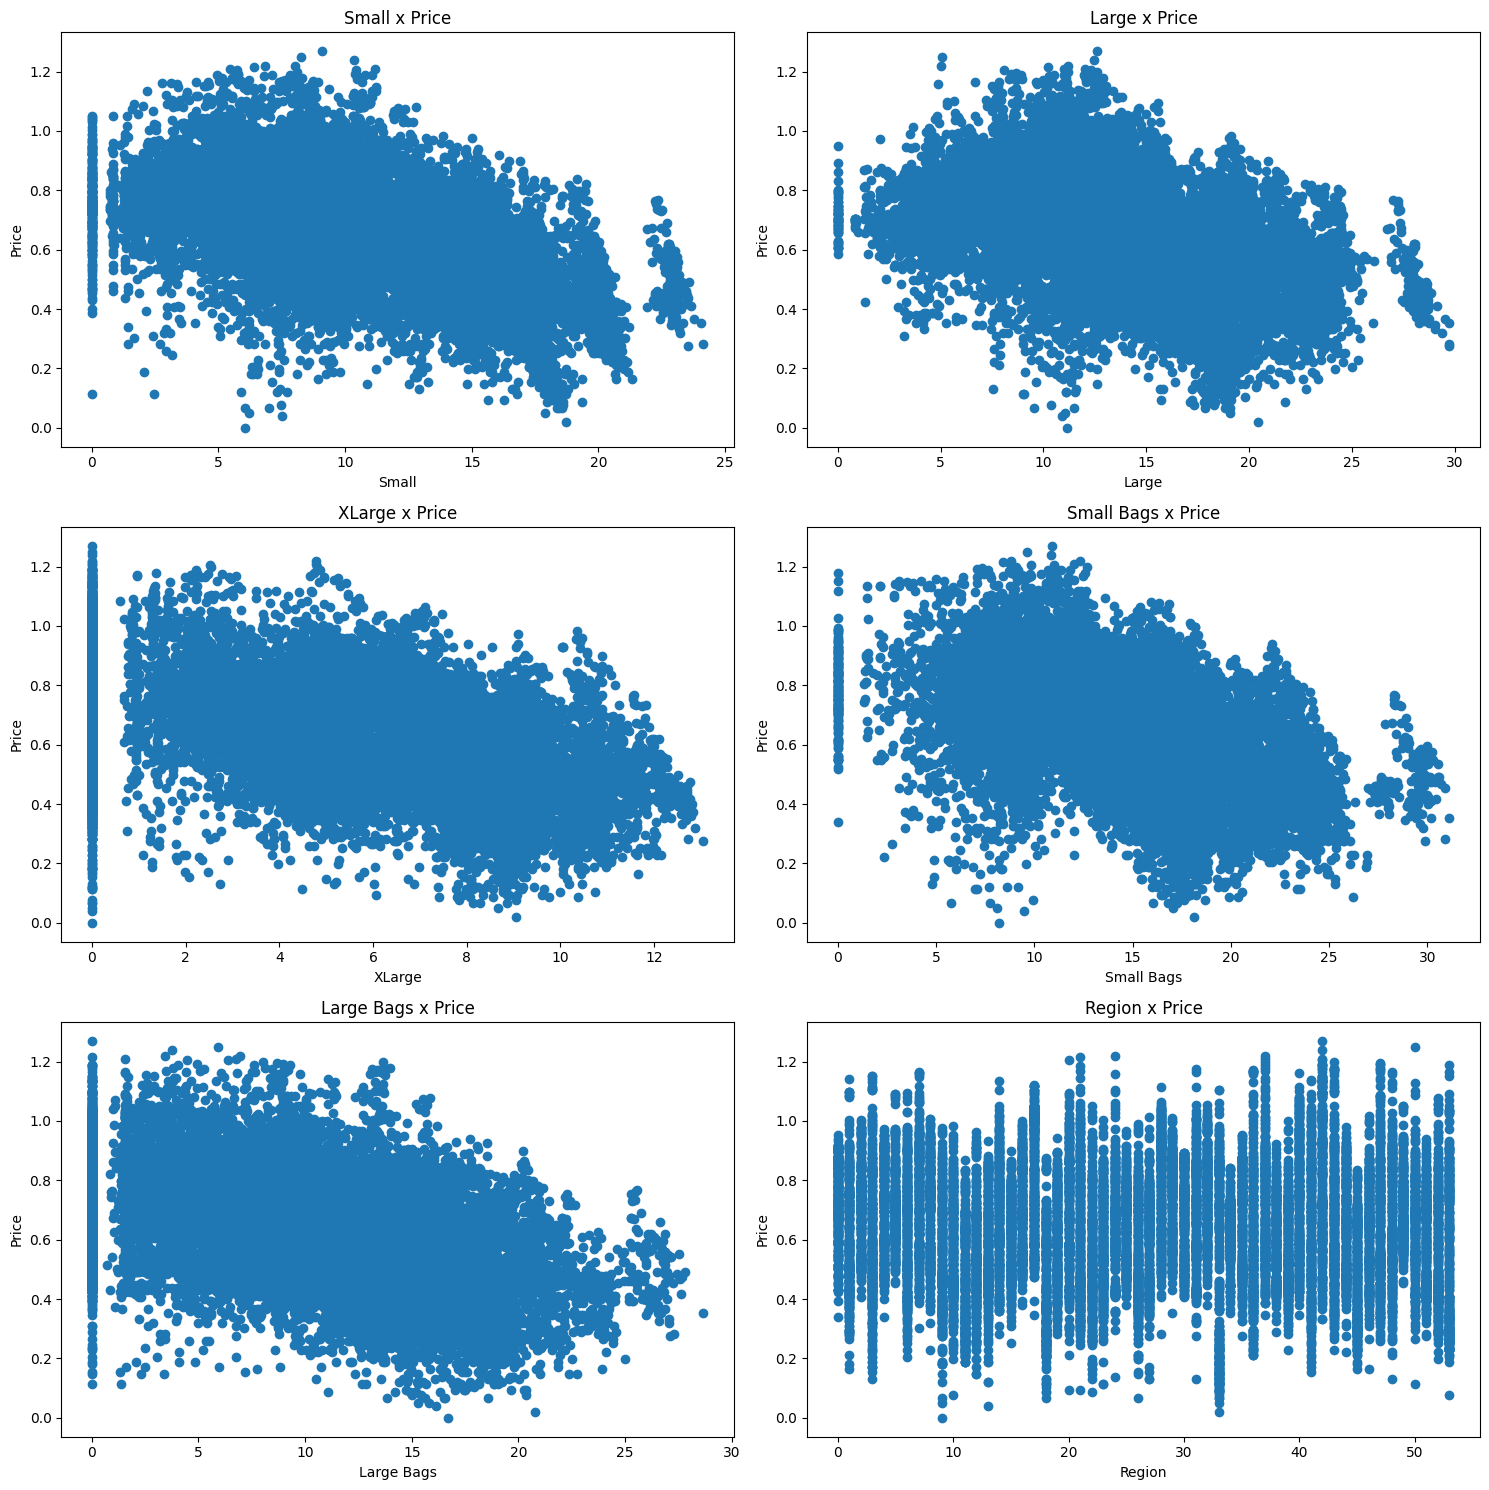

In [146]:
num_plots = len(negative_correlated)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

axs = axs.flatten()

for i, column in enumerate(negative_correlated):
    axs[i].scatter(dataset[column], dataset['Average Price'])
    axs[i].set_xlabel(f'{column}')
    axs[i].set_ylabel('Price')
    axs[i].set_title(f'{column} x Price')

for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()


# Fitting the Linear Model

**Splitting the dataset into training set and test set**

In [147]:
x = dataset[[cols for cols in dataset.columns if (cols != 'Average Price')]]
y = dataset['Average Price']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

**Training the Linear model on Training set**

In [148]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

**Predicting the test set results with R^2 score**

In [149]:
y_pred = regressor.predict(x_test)
r2 = r2_score(y_test,y_pred)

print("R2 Score: ",r2)

R2 Score:  0.3824551985313136


# Statsmodel Summary for all indepent variables against dependent variable

**Assessing the strength of the correlation between the independent and the dependent variables.**

In [150]:
for columns in dataset.columns:
  X = sm.add_constant(dataset[columns])
  y = dataset['Average Price']
  model = sm.OLS(y,X).fit()

  print("Statsmodel summary for",columns)
  print(model.summary())

Statsmodel summary for Date
                            OLS Regression Results                            
Dep. Variable:          Average Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 15 Mar 2024   Prob (F-statistic):                nan
Time:                        15:51:37   Log-Likelihood:                 4344.3
No. Observations:               18249   AIC:                            -8687.
Df Residuals:                   18248   BIC:                            -8679.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.944e-37   

# Feature selection for Linear Regression

The **mean** values of the positively correlated attributes and the negatively correlated attributes is calculated.

In [151]:
total_pos = sum(x for x in positive_correlated.values())
total_neg = sum(x for x in negative_correlated.values())

positive_mean = total_pos/len(positive_correlated)
negative_mean = total_neg/len(negative_correlated)

print("Mean of positively correlated attributes:",positive_mean)
print("Mean of negatively correlated attributes:",negative_mean)

Mean of positively correlated attributes: 0.28596823367566365
Mean of negatively correlated attributes: -0.43034244175882025


All the attributes that have correlation (positive) less than the mean value of positive_correlation can be dropped.

Similarly, all the attributes that have correlation values (negative side) greater than the mean value of negative_correlation, they can also be dropped.

In [152]:
columns_to_drop = []

for x, y in positive_correlated.items():
  if(y<positive_mean):
    columns_to_drop.append(x)

for x,y in negative_correlated.items():
  if(y>negative_mean):
    columns_to_drop.append(x)

print(columns_to_drop)


['Date', 'Year', 'Region']


In [153]:
dataset = dataset.drop(columns = columns_to_drop)
dataset.head()

,Average Price,Small,Large,XLarge,Small Bags,Large Bags,XLarge Bags,Type
0,0.620636,7.995299,15.607628,3.769413,12.723064,5.377630,0.0,0
1,0.630636,7.434186,15.218177,3.945166,12.893882,5.438759,0.0,0
2,0.392481,7.647351,17.008594,4.682910,12.594828,5.516526,0.0,0
3,0.485033,8.111170,16.162407,4.145679,11.942806,5.879964,0.0,0
4,0.595129,7.868726,15.182964,4.185248,12.040958,6.440275,0.0,0


**Splitting the dataset into training set and test set**

In [154]:
x = dataset.drop(columns=['Average Price'],axis=1)
y = dataset['Average Price']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

**Training the Linear model on Training set**

In [155]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

**Predicting the test set results with R^2 score**

In [156]:
y_pred = regressor.predict(x_test)
r2 = r2_score(y_test,y_pred)

print("R2 Score: ",r2)

R2 Score:  0.45016346145782704


# Inference and Conclusion

**Inference**

R^2 measures the goodness of fit of a regression model. It provides an indication of how well the model captures the observed variations in the dependent variable.

Initially the R^2 score for the Linear model was **0.382**

After selecting the independent variables that have strong correlation with dependent variable, price the R^2 score increased to **0.450**

**Conclusion**

The increase in the R^2 score from 0.382 to 0.450 suggests **that by selecting dependent variables that have a strong correlation** with the independent variable (price), **the regression model's ability to explain the observed variations in the dependent variable has improved**.

